In [52]:
import torch
import matplotlib.pyplot as plt

X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

step_size = 0.1
loss_list = []
iter = 20

In [53]:
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	599.4191284179688, 	-1.8486833572387695, 	-16.049776077270508
1, 	345.13153076171875, 	-7.246109485626221, 	-12.808083534240723
2, 	203.79891967773438, 	-3.6136090755462646, 	-10.26870346069336
3, 	122.87068176269531, 	-6.0110931396484375, 	-8.200874328613281
4, 	75.31288146972656, 	-4.391293048858643, 	-6.570586204528809
5, 	46.75969696044922, 	-5.455397129058838, 	-5.250157356262207
6, 	29.3231201171875, 	-4.73243522644043, 	-4.204455375671387
7, 	18.535839080810547, 	-5.204193592071533, 	-3.3606646060943604
8, 	11.797240257263184, 	-4.8810930252075195, 	-2.690349578857422
9, 	7.557866096496582, 	-5.089898109436035, 	-2.1508665084838867
10, 	4.877159595489502, 	-4.945230007171631, 	-1.7213680744171143
11, 	3.175880193710327, 	-5.037428855895996, 	-1.3763225078582764
12, 	2.0933990478515625, 	-4.972481727600098, 	-1.101208209991455
13, 	1.4033981561660767, 	-5.013050556182861, 	-0.8804672956466675
14, 	0.9630143642425537, 	-4.983783721923828, 	-0.7042802572250366
15, 	0.6816962361

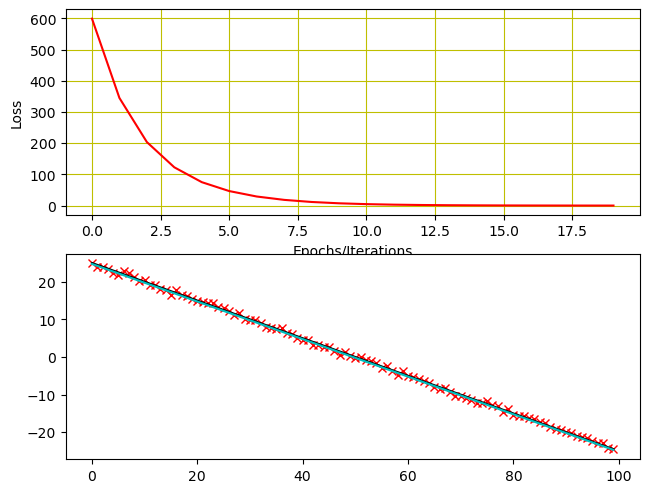

In [54]:
# Plotting the loss after each iteration
plt.subplot(2,1,1)
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.subplot(2,1,2)
plt.plot(Y.detach(), 'rx')
plt.plot(func.detach(), 'k-')
plt.plot((w*X + b).detach(), 'c-')
plt.show()

In [55]:
# 首先得到模型的预测值
Y_pred = forward(X)

# 使用定义好的损失函数计算损失
loss = criterion(Y_pred, Y)

# 输出损失值
print("Loss:", loss.item())

Loss: 0.23615694046020508


In [56]:
torch.randn(X.size()).mean()

tensor(0.1266)